# **Probability of default**


---

## Импортируем нужные библиотеки


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

---

## Немного вводной информации о предметной области (Buisness Understanding)

> *Дефолт* - невыполнение юридических обязательств по погашению долга. Например, когда покупатель дома не в состоянии произвести платеж по ипотеке, или когда компания не в состоянии оплатить кредит/облигацию.

Таким образом, *вероятность дефолта* измеряет степень вероятности того, что заемщик кредита или долга (должник) не сможет произвести необходимые запланированные выплаты по долгу, тем самым не выполнив обязательства по долгу.

Чем выше вероятность дефолта, которую кредитор оценивает для заемщика, тем выше процентная ставка, которую кредитор будет взимать с заемщика в качестве компенсации за более высокий риск дефолта.

Модели вероятности дефолта подразделяются на:
*   структурные
*   эмпирические

*Структурные* модели рассматривают платежеспособность заемщика на основе рыночных данных, таких как цены акций, рыночная и балансовая стоимость активов и обязательств, а также волатильность этих переменных, и, следовательно, используются преимущественно для прогнозирования вероятности дефолта компаний и стран.

*Эмпирические* модели или модели кредитного скоринга используются для количественного определения вероятности дефолта ссуды или держателя ссуды, где оцениваются индивидуальные характеристики (например, возраст, уровень образования, отношение долга к доходу и другие переменные), что делает второй подход более применимым к розничному банковскому сектору.

---

## Оценка и анализ данных (Data Understanding)

### Подгружаем данные

In [ ]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv

--2022-10-01 14:27:51--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5329268 (5.1M) [text/plain]
Saving to: ‘PD-data-train.csv.26’

PD-data-train.csv.2 100%[===================>]   5.08M  --.-KB/s    in 0.08s   

2022-10-01 14:27:51 (66.3 MB/s) - ‘PD-data-train.csv.26’ saved [5329268/5329268]

--2022-10-01 14:27:51--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282

In [ ]:
train_df = pd.read_csv('PD-data-train.csv', sep=';')
test_df = pd.read_csv('PD-data-test.csv', sep=';')
desc_df = pd.read_csv('PD-data-desc.csv', sep=';')

### Исследование предоставленных данных

Просмотрим критерии, отражающие информацию о компаниях в выборке

In [ ]:
desc_df

,field,desc_eng,desc_rus
0,ar_revenue,Sales revenue (at the end of the last year),Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Total expenses for the last year,Общие расходы за последний год
2,ar_sale_cost,Cost of sales (at the end of the last year),Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Selling expenses (at the end of the last year),Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Administrative expenses (at the end of the las...,Управленческие расходы (на конец последнего года)
5,ar_sale_profit,Profit from sales (at the end of the last year),Прибыль от реализации (на конец последнего года)
6,ar_balance_of_rvns_and_expns,Balance of income and expenses (at the end of ...,Баланс доходов и расходов (на конец последнего...
7,ar_profit_before_tax,Gross Profit (end of last year),Валовая прибыль (на конец последнего года)
8,ar_taxes,Current income tax (at the end of the last year),Текущий на налог на прибыль (на конец последне...
9,ar_other_profit_and_losses,Other income and expenses (at the end of the l...,Прочие доходы и расходы (на конец последнего г...


Взглянем на выборку для обучения

In [ ]:
train_df.shape

(32395, 37)

In [ ]:
train_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,...,3,3,3,[1-100],50000.0,2,0,0,0,0
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,28,28,[1-100],10000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,...,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,...,27,27,27,[1-100],10000.0,2,0,0,0,0


Обратим внимание, что у некоторых компаний в выборке отсутствуют данные об их финансовых показателях (id 13, 18 и пр.)

In [ ]:
# Немного перебрав 2й индекс loc[index_1][index_2], нашел список с названиями отсутствующих финансовых показателей
train_df.loc[1][1:25]

# p.s. да, ручной перебор может быть не лучшим решением, если бы таких показателей было гораздо больше
# Вместо этого можно было бы взглянуть на весь список с критериями (desc_df) целиком
# Присмотревшись, можно обратить внимание, что первые 24 можно отнести к финансовым показателям

ar_revenue                      NaN
ar_total_expenses               NaN
ar_sale_cost                    NaN
ar_selling_expenses             NaN
ar_management_expenses          NaN
ar_sale_profit                  NaN
ar_balance_of_rvns_and_expns    NaN
ar_profit_before_tax            NaN
ar_taxes                        NaN
ar_other_profit_and_losses      NaN
ar_net_profit                   NaN
ab_immobilized_assets           NaN
ab_mobile_current_assets        NaN
ab_inventory                    NaN
ab_accounts_receivable          NaN
ab_other_current_assets         NaN
ab_cash_and_securities          NaN
ab_losses                       NaN
ab_own_capital                  NaN
ab_borrowed_capital             NaN
ab_long_term_liabilities        NaN
ab_short_term_borrowing         NaN
ab_accounts_payable             NaN
ab_other_borrowings             NaN
Name: 1, dtype: object

Посчитаем количество компаний, у которых отсутствует информация о финансовых показателях и долю таких компаний в общей выборке

Количество компаний, у которых информация о фин. показателях отсутствует - 15145
Доля таких компаний от общего количества в выборке - 0.47



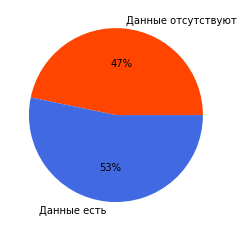

In [ ]:
empty_data_num = 0 #количество компаний
for i in range(train_df['record_id'].size):
  if train_df.loc[i][1:25].isnull().sum() == 24:
    empty_data_num += 1
print(f"Количество компаний, у которых информация о фин. показателях отсутствует - {empty_data_num}")

share = round(empty_data_num / train_df['record_id'].size, 2) #доля компаний
print(f"Доля таких компаний от общего количества в выборке - {share}")
print()

# цикл выше абсолютно ужасный с точки зрения времени на выполнение. И вообще ужасный. Было бы неплохо придумать что-то красивее,
# но в конечном итоге только он у меня и заработал (до этого пробовал другие способы)


# Для наглядности построим график, отражающий соотношение компаний с данными и без
not_empty_data_num = train_df['record_id'].size - empty_data_num

data = [empty_data_num, not_empty_data_num]
keys = ['Данные отсутствуют', 'Данные есть']
plt.pie(data, labels=keys, autopct='%.0f%%', colors = ['orangered', 'royalblue'])
plt.show()

Посмотрим на количество компаний с дефолтом и без, а также их доли от общего количества

In [ ]:
default_data = train_df['default_12m'].value_counts()
default_data

0    30304
1     2091
Name: default_12m, dtype: int64

Доля компаний без дефолта от общего количества - 0.94
Доля компаний с дефолтом от общего количества - 0.06



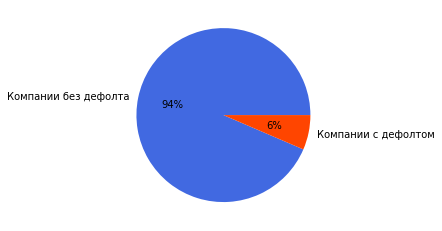

In [ ]:
num_not_defaulted_companies = default_data[0]
num_defaulted_companies = default_data[1]

share_not_defaulted_companies = round(num_not_defaulted_companies / train_df['record_id'].size, 2)
share_defaulted_companies = round(num_defaulted_companies / train_df['record_id'].size, 2)

print(f"Доля компаний без дефолта от общего количества - {share_not_defaulted_companies}")
print(f"Доля компаний с дефолтом от общего количества - {share_defaulted_companies}")
print()

# Для наглядности построим график, отражающий соотношение компаний с дефолтом и без
data = [num_not_defaulted_companies, num_defaulted_companies]
keys = ['Компании без дефолта', 'Компании с дефолтом']
plt.pie(data, labels=keys, autopct='%.0f%%', colors = ['royalblue', 'orangered'])
plt.show()

Средние показатели по каждому из критериев(фич) компаний с дефолтом и без

In [ ]:
train_df.groupby('default_12m').mean()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
default_12m,,,,,,,,,,,,,,,,,,,,,
0,137015.579791,8.319980e+07,7.829795e+07,7.464469e+07,2.554630e+06,1.098632e+06,4.901846e+06,-649631.231676,4.252215e+06,433912.883068,...,99.292503,80.125198,15.148627,15.148627,15.148627,1.443276e+06,12.473700,0.022967,0.000099,0.0
1,136085.308943,4.718194e+07,4.550537e+07,4.340810e+07,1.353368e+06,7.439008e+05,1.676565e+06,-494600.502513,1.181965e+06,106557.788945,...,65.658058,57.190340,13.006217,13.006217,13.006217,2.539653e+05,4.306552,0.002869,0.000000,0.0


### Выводы

*   Доля компаний, у которых отсутствует информацмя о фин. показателях, от общей выборки достаточно высокая.

  Вероятно, это может повлиять на результат предсказания не лучшим образом, так как в этом случае модель будет более чувствительна к оставшимся заполненным данным (Срок ведения бизнеса, количество сотрудников и т.д.).

  Хотя эти критерии тоже влияют на оценку вероятности дефолта, все же финансовые показатели компании более приоритетны для прогнозирования риска дефолта, нежели, например, срок с момента назначения руководителя (новый руководитель может быть более успешным управленцем, нежели засидевшийся. А может быть и обратная ситуация).

  Поэтому учтем этот момент в будущем (наверно, неплохой идеей было бы попробовать удалить компании без информации о фин. показателях из выборки, и посмотреть, улучшится ли результат предсказания после удаления)

*   Средняя чистая прибыль (ar_net_profit) у компаний с дефолтом была примерно в 4 раза меньше, чем у компаний без дефолта.

  Несмотря на это, долговые обязательства компаний с дефолтом были не намного меньше, чем у компаний без дефолта (показатели ab_borrowed_capital, ab_long_term_liabilities, ab_short_term_borrowing, ab_accounts_payable примерно в 1,5 раза меньше, чем у компаний без дефолта)

*   Наши классы несбалансированы: соотношение компаний без дефолта к компаниям с дефолтом составляет 94:6, поэтому поиск класса меньшинства (компании с дефолтом) будет сильно затруднен, и как следствие, результат предсказания будет хуже, т.к. классификатор машинного обучения будет более предвзят к классу большинства.



---

## Подготовка данных (Data Preparation)

### Балансировка классов методом SMOTE

Как упоминалось ранее, из-за малого количества компаний с дефолтом в выборке, у нас наблюдается дисбаланс классов.

Чтобы это исправить, воспользуемся методом SMOTE (Synthetic Minority Over-sampling Technique). Простыми словами, SMOTE:


1.   Работает путем создания синтетических образцов из второстепенного класса (по умолчанию) вместо создания копий
2.   Случайно выбирает одного из k ближайших соседей и использует его для создания аналогичных, но случайно измененных новых наблюдений



Спойлер: метод  SMOTE не позволяет работать с дата фреймом, в котором присутствуют значения string (как в столбце 'ul_staff_range') и фреймом, где присутствуют пустные значения Nan.

Поэтому удалим столбец 'ul_staff_range', содержащий строковые значения, и строки дата фрейма, содержащие значения Nan

In [ ]:
train_df.drop('ul_staff_range', inplace=True, axis=1)
train_df.dropna(inplace=True)

In [ ]:
X = train_df.loc[:, train_df.columns != 'default_12m']
y = train_df.loc[:, train_df.columns == 'default_12m']

os = SMOTE(random_state=21)
columns = X.columns

os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['default_12m'])

Посмотрим на количество данных после балансировки 

In [ ]:
print("Количество данных после изменений в выборке и ее балансировки ", len(os_data_X))
print("Количество компаний без дефолта в выборке после балансировки ", len(os_data_y[os_data_y['default_12m']==0]))
print("Количество компаний с дефолтом в выборке после балансировки ", len(os_data_y[os_data_y['default_12m']==1]))
print("Соотношение компаний без дефолта в выборке после балансировки ", len(os_data_y[os_data_y['default_12m']==0])/len(os_data_X))
print("Соотношение компаний с дефолтом в выборке после балансировки ", len(os_data_y[os_data_y['default_12m']==1])/len(os_data_X))

Количество данных после изменений в выборке и ее балансировки  32908
Количество компаний без дефолта в выборке после балансировки  16454
Количество компаний с дефолтом в выборке после балансировки  16454
Соотношение компаний без дефолта в выборке после балансировки  0.5
Соотношение компаний с дефолтом в выборке после балансировки  0.5


Как видно, наша выборка теперь идеально сбалансирована

Более того, по ходу дела мы удалили компании, у которых отсутсовала информация о финансовых показателях, как мы и хотели сделать ранее

### Уменьшение количества признаков (фичей) методом (RFE)

RFE (Recursive Feature Elimination) основан на идее многократного построения модели и выбора лучшего или худшего признака, откладывания этого признака и последующего повторения процесса с остальными признаками.

Этот процесс применяется до тех пор, пока все признаки в наборе данных не будут исчерпаны. Целью RFE является выбор признаков путем рекурсивного рассмотрения все меньших и меньших наборов признаков.

In [ ]:
# Признаюсь честно, о методе RFE до этого не знал. Почитав о нем статью (ссылка будет в конце в разделе Заключение),
# выяснил, что n_features_to_select является гиперпараметром, в зависимости от которого результат выбора тех или иных фич
# может быть лучше или хуже для предсказания классификатора.

# В статье был приведен пример алгоритма для подбора оптимального гиперпараметра, но поскольку этот этап задания
# я делаю за 2 дня до дедлайна, эксперементировать с ним не буду и просто предположу, что 25 из 35 фич будет достаточно

tree_wow = DecisionTreeClassifier()

rfe = RFE(estimator=tree_wow, n_features_to_select=25)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True False  True  True  True  True  True False False
 False  True  True  True False  True  True  True  True False  True  True
  True  True  True  True False  True  True  True False False False]
[ 1  1  1  1  8  1  1  1  1  1  7  3  5  1  1  1  6  1  1  1  1  2  1  1
  1  1  1  1  4  1  1  1  9 10 11]


Сформируем таблицу с этими признаками, сгруппировав их по важности 

In [ ]:
data_X1 = pd.DataFrame({
 'Feature': os_data_X.columns,
 'Importance': rfe.ranking_},)

data_X1.sort_values(by=['Importance'])

,Feature,Importance
0,record_id,1
31,ul_founders_cnt,1
30,ul_capital_sum,1
29,cap_actual_age,1
27,adr_actual_age,1
26,ogrn_age,1
25,bus_age,1
24,ab_other_borrowings,1
23,ab_accounts_payable,1
22,ab_short_term_borrowing,1


Метод RFE выбрал для нас 25 наиболее важных признаков (те, у которых Importance=1). Занесем их в лист

Единственное, меня смущает выбор признака record_id. Очень сомневаюсь, что id компании в дата-сете играет важную роль в предсказании дефолта.

Поэтому, сначала добавлю все 25 признаков, включая record_id, а после вручную удалю record_id и вместо него добавлю признак ab_long_term_liabilities, у которого Importance=2

In [ ]:
final_features=[]
for i in range (0, len(data_X1['Importance'])): # Заносим в лист все фичи, важность которых равна 1 (включая record_id)
 if data_X1['Importance'][i] == 1:
   final_features.append(data_X1['Feature'][i])

# Ниже удалим из листа record_id и добавим ab_long_term_liabilities
final_features.remove('record_id')
final_features.append('ab_long_term_liabilities')
print(final_features)

['ar_revenue', 'ar_total_expenses', 'ar_sale_cost', 'ar_management_expenses', 'ar_sale_profit', 'ar_balance_of_rvns_and_expns', 'ar_profit_before_tax', 'ar_taxes', 'ab_mobile_current_assets', 'ab_inventory', 'ab_accounts_receivable', 'ab_cash_and_securities', 'ab_losses', 'ab_own_capital', 'ab_borrowed_capital', 'ab_short_term_borrowing', 'ab_accounts_payable', 'ab_other_borrowings', 'bus_age', 'ogrn_age', 'adr_actual_age', 'cap_actual_age', 'ul_capital_sum', 'ul_founders_cnt', 'ab_long_term_liabilities']


---

## Разработка модели (Modeling)

Подгружаем тренировочные данные после балансировки классов и уменьшения фич

In [ ]:
X=os_data_X[final_features] # Определяем признаки
y=os_data_y['default_12m'] # Определяем результирующий признак

Имплементация модели Логистической регрессии

In [ ]:
# С помощью функции train_test_split разбиваем выборку на обучающую и тестовую. Параметр test_size указывает на 
# долю тестовой выборки. Если параметр random_state отличен от None, т.е. имеет конкретное значение, то 
# генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове, и мы будем каждый 
# раз получать одинаковое разбиение на обучающую и тестовую выборки. Условимся, что, если не указано другое, то
# по всему курсу обучения random_state=21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Функция StandardScaler приведет значения признаков к стандартному виду z = (x-u)/s, где u - среднее значение,
# а s - стандартное отклонение. Расчет среднего значения и стандартного отклонение осуществляется на выборке для 
# обучения, затем осуществляется преобразования данных для обучения и тестовых данных
sc = StandardScaler()
sc.fit(X_train)                                  # Находим среднее и стандартное отклонение обучающей выборки
X_train_std = sc.transform(X_train)              # Преобразовываем обучающую выборку
X_test_std = sc.transform(X_test)                # Преобразовываем тестовую выборку


# Формируем классификатор с помощью DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)
y_pred = tree.predict(X_test_std) # Определяем класс на значениях тестовых данных

---

## Оценка результатов модели (Evaluation)

In [ ]:
print(classification_report(y_test, y_pred)) # Выведем результаты качества модели на тестовой выборке

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4117
           1       0.88      0.92      0.90      4110

    accuracy                           0.90      8227
   macro avg       0.90      0.90      0.90      8227
weighted avg       0.90      0.90      0.90      8227



- Точность (precision) класса 0 в отчете классификатора говорит нам о том, что наша модель была права в 92% случаев, когда предсказывала, что у компании нет дефолта (оставшиеся 8% - случаи, когда модель ошиблась, предсказывая, что у компании нет дефолта, хотя на самом деле он был)

- Recall класса 0 в отчете классификатора говорит нам о том, что наша модель выявила 87% компаний без дефолта из числа всех компаний без дефолта (оставшиеся 13% - случаи, когда модель ошиблась)

- Показатель F1-score в обоих классах равен 0.9. Остальные показатели тожи хорошие, поэтому можно строить эту модель на всех данных и внедрять на тестовом фрейме test_df

Строим модель на всех данных

In [ ]:
tree.fit(X, y)

DecisionTreeClassifier()

---

## Внедрение (Deployment)

Теперь, когда у нас есть работающая модель, мы можем назначить вероятность дефолта компаниям-претендентам на получение кредита из тестовой выборки test_df

Сформируем файл с отчетом

In [ ]:
answ_df = test_df[['record_id']]

In [ ]:
answ_df['id'] = answ_df['record_id']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
answ_df.drop('record_id',axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Поскольку метод predict_proba выдавал ошибку 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32')

Заменим значения NaN в дата фрейме test_df на нули. Тогда ошибка пропадет

In [ ]:
test_df = test_df.fillna(0)

Заполним столбец predict

In [ ]:
cutoff = y_train.mean()
answ_df['predict'] = (tree.predict_proba(test_df.loc[:,final_features])[:,1]>cutoff).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bad_companies_num = len(answ_df[answ_df['predict']==1])
share_bad_companies = round(bad_companies_num / len(answ_df), 2)
print(f"Количество компаний, которые не выполнят обязательства - {bad_companies_num}")
print(f"Доля таких компаний от общего количества в выборке - {share_bad_companies}")

Количество компаний, которые не выполнят обязательства - 47
Доля таких компаний от общего количества в выборке - 0.23


Сохраним отчет о прогнозировании в файл

In [ ]:
answ_df.to_csv('PD-submit.csv',index=False, sep=';')

---

## Вывод по итогам работы

Что нового изучил по ходу выполнения задания:

- Почему дисбаланс классов это проблема, методы решения этой проблемы
- Метод RFE для выбора наиболее важных признаков (фичей), а также определения их оптимального количества
- Не так-то просто нарисовать график, который нес бы хоть какую-то смысловую нагрузку

Источники, которые очень помогли в ходе выполнения задания:

1.   Книга Джоэла Граса "Data Science. Наука о данных с нуля" - издательство O'Reilly
2.   Статья, в которой выполнен разбор по-сути такой же задачи
https://medium.com/@polanitzer/logistic-regression-in-python-predict-the-probability-of-default-of-an-individual-8a0091da3775
3.   Статья о методе RFE
https://machinelearningmastery.com/rfe-feature-selection-in-python/
4.   Статья о дисбалансе классов
https://towardsdatascience.com/class-imbalance-a-classification-headache-1939297ff4a4
5.   Интенсив по Data Science, пройденный в Школе21
https://github.com/NellyNelson21/Python_Data_Science


Бонусный мем напоследок:

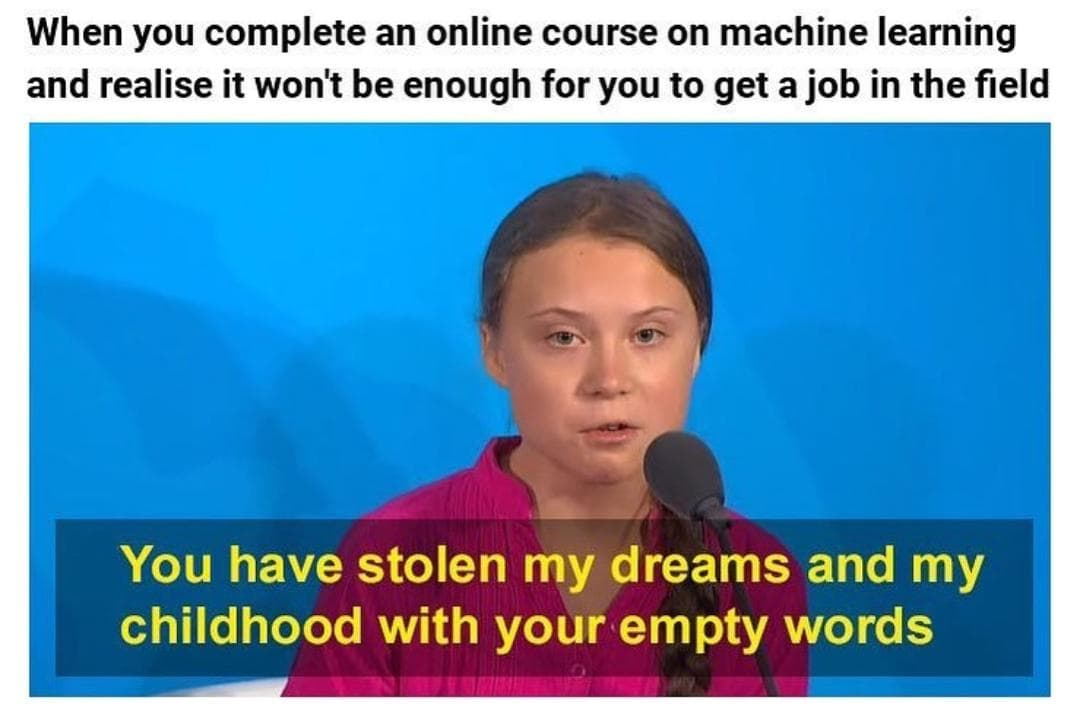